In [1]:
import seaborn as sns
import pandas as pd
titanic=sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
titanic.shape

(891, 15)

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
print("Total Number of Traveler", len(titanic))

Total Number of Traveler 891


In [10]:
print(titanic['survived'].value_counts())

survived
0    549
1    342
Name: count, dtype: int64


In [15]:
titanic['survived'].value_counts(normalize=True) *100

survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64

In [16]:
titanic.groupby("sex")["survived"].mean()*100

sex
female    74.203822
male      18.890815
Name: survived, dtype: float64

In [17]:
titanic.groupby("class")["survived"].mean()*100

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19048\3952637302.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby("class")["survived"].mean()*100


class
First     62.962963
Second    47.282609
Third     24.236253
Name: survived, dtype: float64

In [18]:
titanic.groupby(["sex","class"])["age"].mean()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19048\2160996933.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby(["sex","class"])["age"].mean()


sex     class 
female  First     34.611765
        Second    28.722973
        Third     21.750000
male    First     41.281386
        Second    30.740707
        Third     26.507589
Name: age, dtype: float64

In [20]:
import matplotlib.pylab as plt

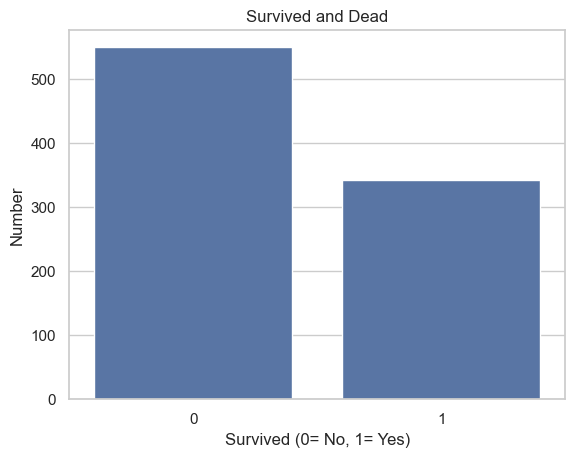

In [25]:
sns.set(style="whitegrid")
sns.countplot(x="survived", data=titanic)
plt.title("Survived and Dead")
plt.xlabel("Survived (0= No, 1= Yes)")
plt.ylabel("Number")
plt.show()

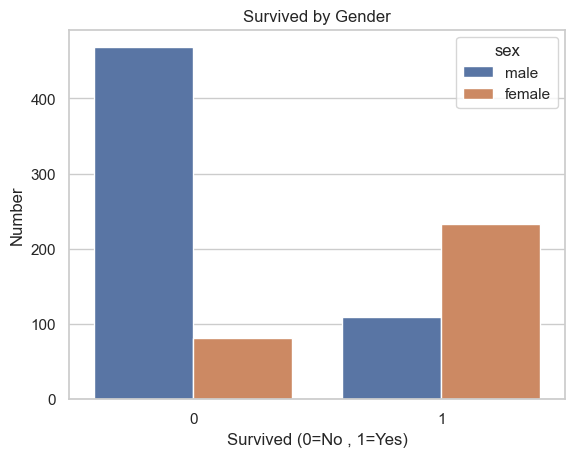

In [27]:
sns.countplot(x="survived", hue="sex", data=titanic)
plt.title("Survived by Gender")
plt.xlabel("Survived (0=No , 1=Yes)")
plt.ylabel("Number")
plt.show()

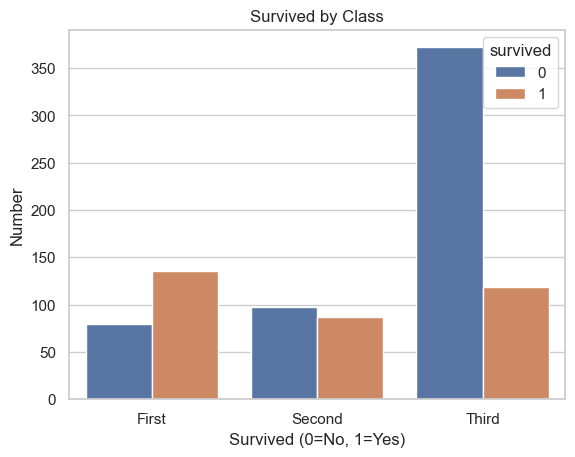

In [29]:
sns.countplot(x="class",hue="survived",data=titanic)
plt.title("Survived by Class")
plt.xlabel("Survived (0=No, 1=Yes)")
plt.ylabel("Number")
plt.show()

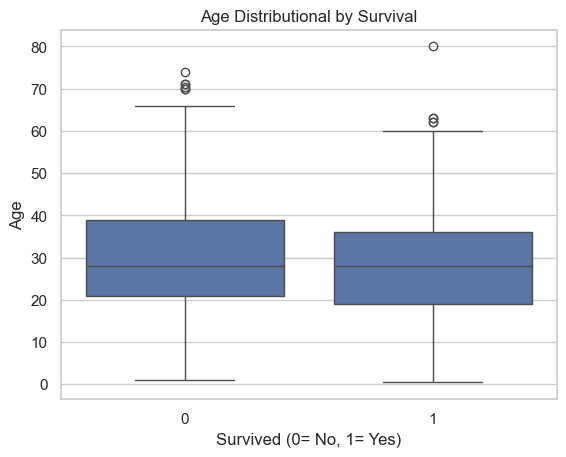

In [30]:
sns.boxplot(x="survived", y="age", data=titanic)
plt.title("Age Distributional by Survival")
plt.xlabel("Survived (0= No, 1= Yes)")
plt.ylabel("Age")
plt.show()

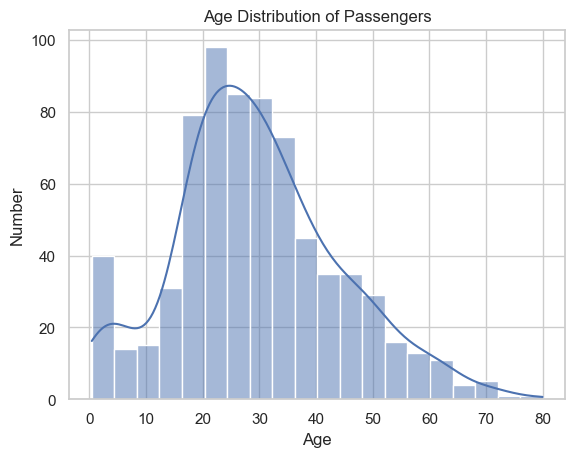

In [33]:
sns.histplot(titanic["age"], bins=20, kde=True)
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Number")
plt.show()

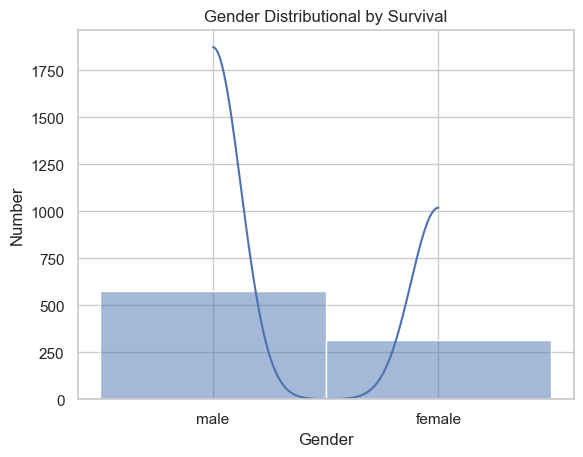

In [36]:
sns.histplot(titanic["sex"] , bins=20, kde=True)
plt.title("Gender Distributional by Survival")
plt.xlabel("Gender")
plt.ylabel("Number")
plt.show()


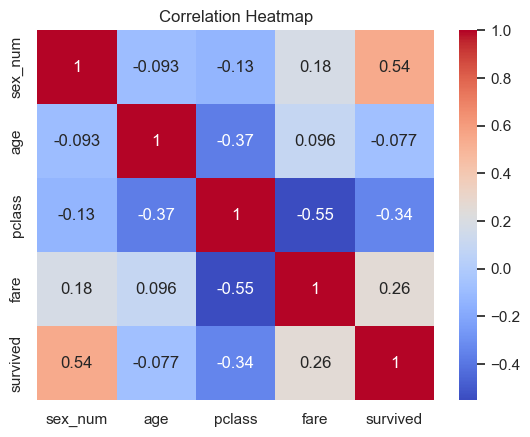

In [45]:
titanic['sex_num']=titanic['sex'].map({"male":0,"female":1})

corr=titanic[["sex_num","age","pclass","fare","survived"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()